In [1]:
#Import Necessary Libraries
import pandas as pd
from matplotlib import pyplot as plt
import random
import sys
sys.path.append("..") #give this script access to all modules in parent directory
import numpy as np
import os
import matplotlib.lines as mlines
from scipy.io import loadmat
import scipy
from scipy.stats import skew

c:\Users\sidha\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\sidha\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:59: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
data_dir = 'C:/Users/sidha/OneDrive/Sid Stuff/PROJECTS/iMEDS Design Team/Data Analysis/PedAccel/data_analysis/PythonPipeline/PatientData'
# data_dir = r'C:\Users\jakes\Documents\DT 6 Analysis\PythonCode\PedAccel\data_analysis\PythonPipeline\PatientData'
window_size = 100 #100 is 1 second worth of time
lead_time = 10
slice_size_min = 15
sr = .5

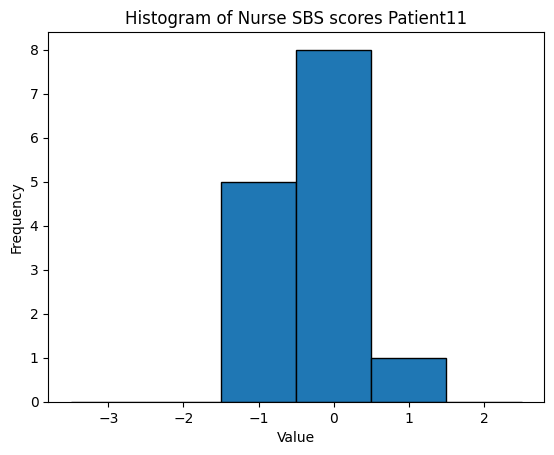

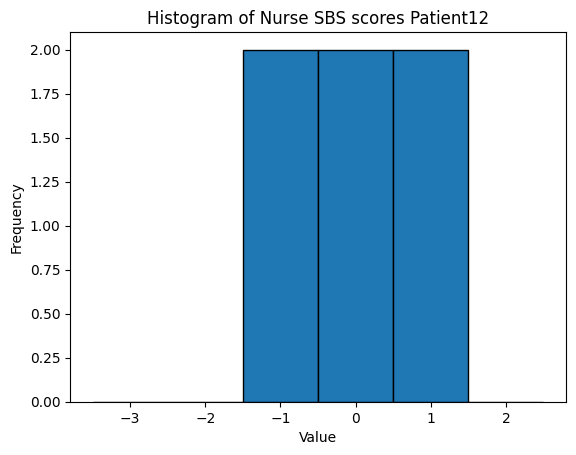

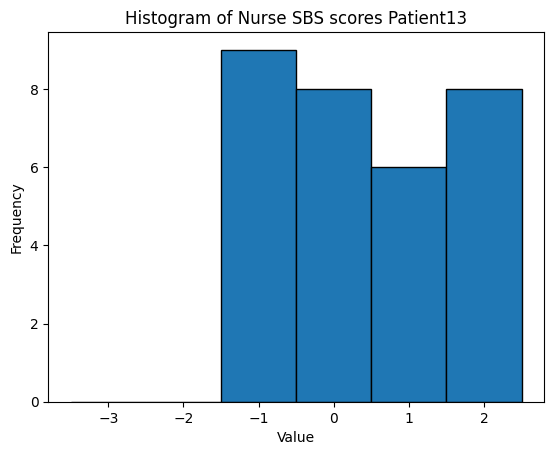

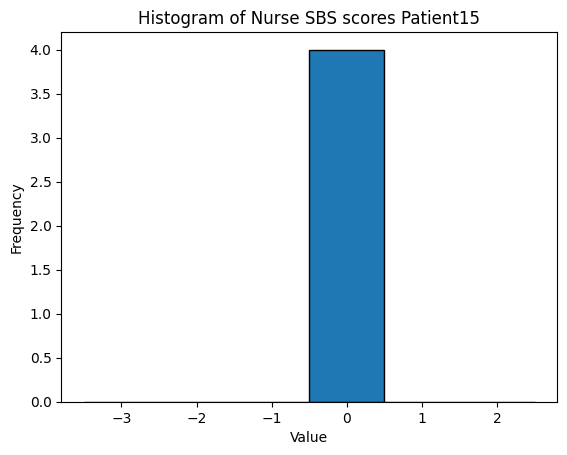

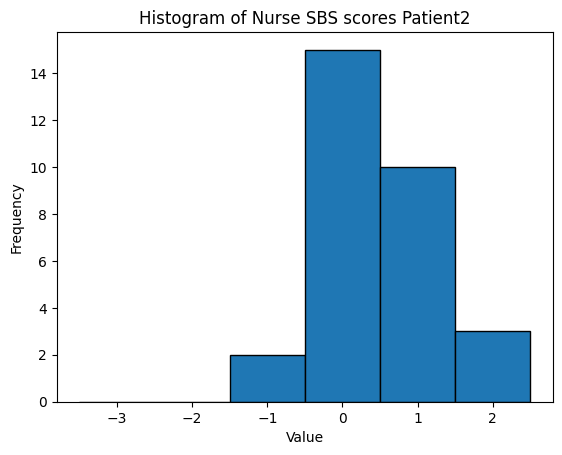

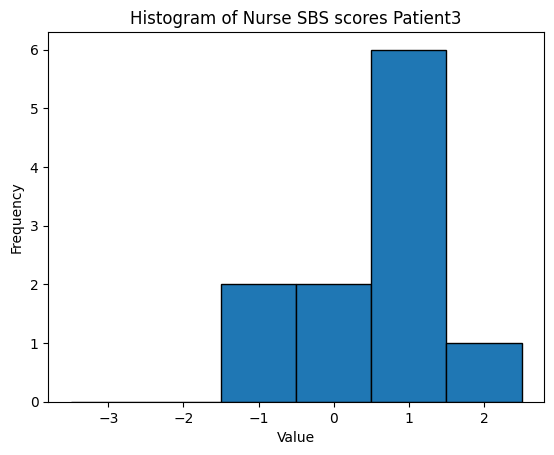

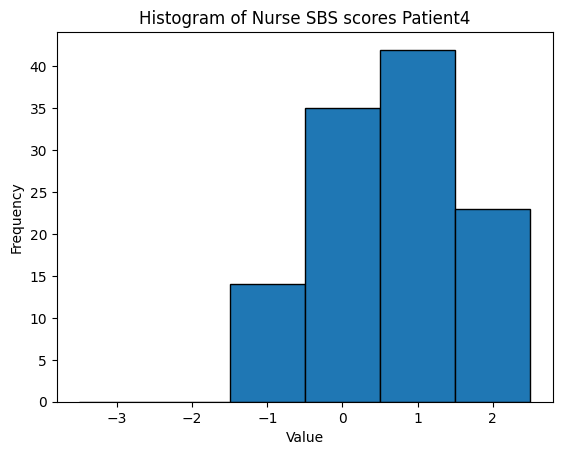

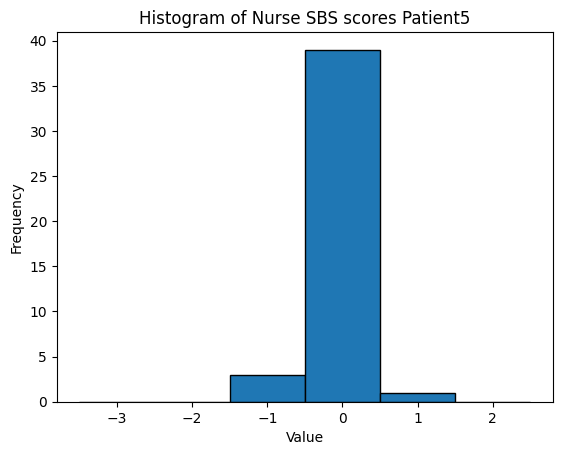

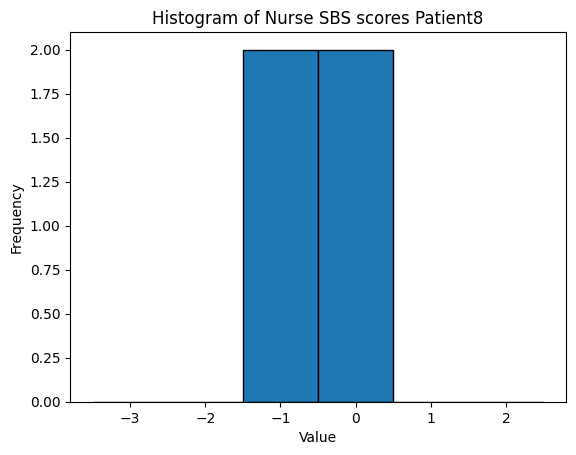

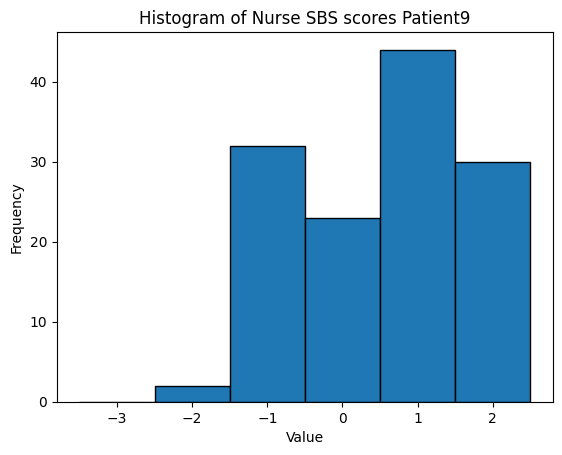

Patients with -2 or 2 are ['Patient13', 'Patient2', 'Patient3', 'Patient4', 'Patient9']
The number of -2 SBS scores in all data is 2
The number of 2 SBS scores in all data is 65
The total number of Patient SBS scores is 388


In [15]:
#There is no error handling in place, the .mat file must exist
count2 = 0
countneg2 = 0
total_count = 0

patients_to_look_at = []

for patient in os.listdir(data_dir):
    # filter out non-directories
    patient_dir = os.path.join(data_dir, patient)
    if os.path.isdir(patient_dir):
        data_filepath_vitals = os.path.join(patient_dir, f'{patient}_SICKBAY_{lead_time}MIN_{slice_size_min - lead_time}MIN_Validated_Stim.mat')
        
        vitals_data = loadmat(data_filepath_vitals)
        vitals_SBS = vitals_data['sbs'].flatten()

        if(2 in vitals_SBS or -2 in vitals_SBS):
            patients_to_look_at.append(patient)

        counts, bin_edges = np.histogram(vitals_SBS, bins=[-3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5])

        countneg2+=counts[1]
        count2+=counts[-1]
        total_count+=len(vitals_SBS)

        # Create a histogram
        plt.hist(vitals_SBS, bins=[-3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5], edgecolor='black', align='mid')

        # Set the title and labels
        plt.title(f'Histogram of Retrospective SBS scores {patient}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')

        # Display the histogram
        plt.show()
        
print(f'Patients with -2 or 2 are {patients_to_look_at}')
print(f'The number of -2 SBS scores in all data is {countneg2}')
print(f'The number of 2 SBS scores in all data is {count2}')
print(f'The total number of Patient SBS scores is {total_count}')

    